# Tutorial Exercises

These tutorial exercises are designed to help you prepare for the first assignment.

As a researcher, there are two distinct phases to data analysis:

* Understanding the dataset yourself - this involves making lots of quick plots and descriptive statistics to
    * check for outliers
    * find out the data distributions
    * look for differences between categories
    * look for associations between variables
<br>    
* Preparing a report for a reader - this involves a focus on readability and the reader
    * explain any key features of the dataset 
    * highlighting key results with descriptive statistics and figures
    * figures should be well labelled and tweaked to make your point as clearly as possible
    * there should be clear, readable explanatory text
    * for most readers/clients, non technical language should be used 
    * in all cases, jargon should be avoided
    
In these tutorial exercises, you will complete some guided tasks (and some open-ended ones) to explore the dataset for yourself.

For the hand-in assignment, you will produce a report on the same dataset for a specified reader.

## Calling tutors!

The idea here is primarily to get students 'playing around' with the data - let them make lots of plots and see what they can see. The refined report will come later (for homework).

I find students can be quite focussed on the process of making plots etc actually work (ie the coding - or in the past the process of drawing it with pencil and paper). Of course what we really want them to do is look at the output, think about what it means and come up with some follow-up questions.

If students object to the open-ended nature of this exercise perhaps you could explain to them taht the learning objective is to give them practice in interpreting graphs and descriptive statistics, looking at the output, think about what it means and comme up with some follow-up questions.

A secondary objective is to give them lots of practice with producing graphs and tables and a sense of which settings work well, when.

Below I have my own 'answers' to the questions - as you can see it's really just rough work exploring the dataset. This is the type of thing I am hoping students would produce!

NOTE - one exercise asks them to recognize Z-scored variables. z-scoring was covered in the reading and lecture so this is just consolidation; it might be worth checking that they got it.

## Crime Survey Data

We will work with a dataset extracted from the Crime Survey England and Wales 2013.

I obtained the data from the UK Data Service, a data repository run by the UK Research Councils. This text is from their introduction to the dataset:

*The Crime Survey for England and Wales (CSEW) is a face-to-face victimisation survey in which
people resident in households in England and Wales are asked about their experiences of a range of
crimes in the 12 months prior to the interview. Respondents to the survey are also asked about their
perceptions of crime and attitudes towards crime related issues such as the police and criminal justice
system.*

The dataset I have given you contains only some of the questions that respondants were asked, containing information about the respondants' individual demographic features, neighbourhood, perceptions of crime and attitudes towards the police and criminal justice system.

The brief for the  hand-in report will be to write a short report for the Home Secretary addressing two topics:
1. Which groups are the most likely to be victims of crime? and 
2. What factors affect confidence in policing and crimial justice?', 

Note that the idea is to write for a generic Home Secretary  - they have responsibility for Law and Order and as a politician are interested in how different sections of the public perceive these issues. You can assume they have no statistical training. However there is no need to accommodate the political attitudes or personal characteristics of any particular Home Secretary.

In these preparatory exercises you will play around with the data to try and work out which factors are important predictors of that confidence.

I have put my own conclusions at the bottom of this page - this is just to give an idea of the kinds of things you might look at.


#### Note

The survey was conducted in 2013 in the UK. Events of recent years may have affected the confidence of certain groups in the police; this would not be reflected in the data used here.


### Set up Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import the data

Download the dataset from Canvas and import them as a dataframe called `crime`

In [2]:
crime = pd.read_csv('../data/CrimeData.csv')
crime

,ID,Sex,Age,AgeGroup,EthnicGroup,Education,SES,DeprivationIndex,Victim,effectx,fairx,confx,antisocx
0,135230170.0,Male,45.0,4,White,University,2.0,3.0,0.0,NaN,NaN,2.290506,3.42
1,135230210.0,Male,28.0,2,White,University,1.0,4.0,0.0,-0.755949,NaN,-0.349198,-0.52
2,135231010.0,Female,58.0,5,Black or Black British,NaN,5.0,2.0,0.0,-1.344910,-0.544786,0.381797,2.27
3,135231210.0,Male,70.0,6,Asian or Asian British,GCSE,3.0,4.0,0.0,NaN,NaN,NaN,NaN
4,135233210.0,Female,64.0,5,White,Other,5.0,5.0,0.0,0.152448,0.914933,-0.613168,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,147638210.0,Male,43.0,3,White,University,1.0,NaN,0.0,-0.436513,NaN,-1.029429,0.31
9296,147639090.0,Male,70.0,6,White,NaN,5.0,NaN,0.0,0.132483,NaN,1.051876,-0.45
9297,147639130.0,Female,80.0,7,White,NaN,5.0,NaN,0.0,NaN,NaN,0.808211,0.27
9298,147639250.0,Male,86.0,7,White,University,1.0,NaN,0.0,-0.446495,0.408086,1.711802,-0.56


### Variables in the dataset

Information about the respondant and their neighbourhood:

* **ID** a unique number for each participant
* **Sex**
* **Age** in years
* **Age Group** ages in 10-year groups
* **Ethnic Group** the categories given are the ones recorded in the original survey
* **Education** highest level of education completed; modern British qualifications are used as a short hand for any equivalent, for example 'A-Levels' includes any equivalent of completing high school to age 18.
* **SES** socio-economic status
    * 1. Managerial and professional occs 
    * 2. Intermediate occs 
    * 3. Small employers and own account workers 
    * 4. Lower supervisory and technical occupations 
    * 5. Semi-routine and routine occupations 
    * 6. Never worked and long term unemployed 
    * 7. Full-time students 
    * 8. Not classified
* **Deprivation Index** this is a neighbourhood-level measure of poverty, in qunitiles
    * 1 is the most deprived (poorest) 20% of neighbourhoods
    * 5 is the least deprived (wealthiest) 20%
* **Victim** has the respondant been a victim of crime in the last 12 months?


Information about the respondant's attitudes on the following questions (each variable actually reflects a combination of the respondant's answers to several questions; for example **antisocx** is based on several questions asking about different antisocial behaviours- 'is there vandalism in your neighbourhood', 'are there gangs present in your neighbourhood' etc):

* **effectx** how effective is the criminal justice system?
* **fairx** how fair is the criminal justice system?
* **confx** how confident are you in the policing of your neighbourhood?
* **antisocx** how much antisocial behaviour is there in your neighbourhood?



## Getting to know the variables

In this first section you will explore each variable individually by making suitable graphs. Complete each code block to produce a suitable plot or descriptive statistic. There are no right answers but in each case you should look at what you produced and evaluate whether your learned something from it!

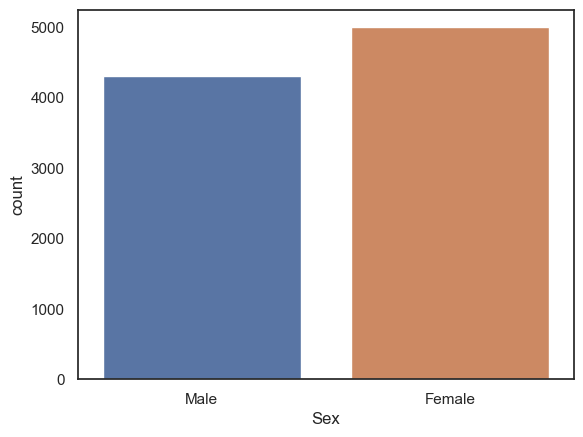

In [3]:
# Are there more men or women in the sample?
sns.countplot(data=crime, x='Sex')
plt.show()

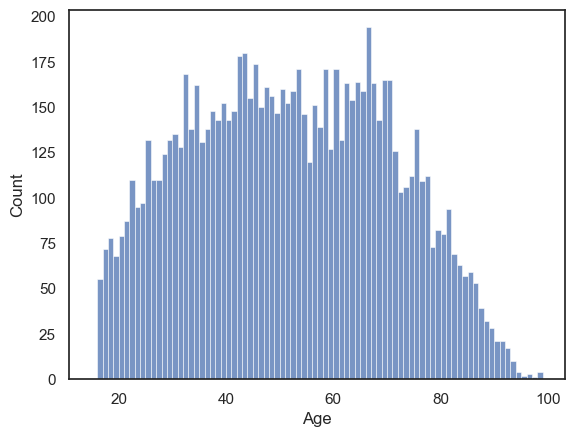

16.0
99.0


In [4]:
# What ages were included in the survey and what is the distribution of respondants' ages?
sns.histplot(data=crime, x='Age', bins=range(15,100))
plt.show()
print(crime.Age.min())
print(crime.Age.max())

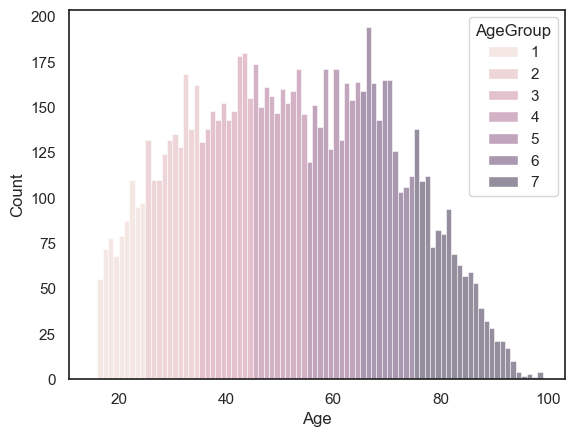

In [5]:
# What are the bins used for the variable AgeGroup?
sns.histplot(data=crime, x='Age', hue='AgeGroup', bins=range(15,100))
plt.show()

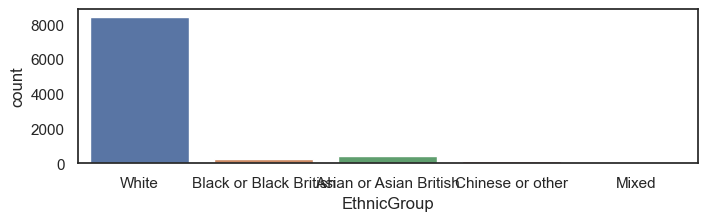

EthnicGroup
Asian or Asian British     390
Black or Black British     255
Chinese or other           116
Mixed                       81
White                     8445
Name: ID, dtype: int64

In [6]:
# How many respondants came from each ethnic group?
plt.figure(figsize=(8,2))
sns.countplot(data=crime, x='EthnicGroup')
plt.show()
crime.groupby('EthnicGroup').ID.count() # I counted the IDs in each ethnic group - without this you woudl get a table giving the counts for each variable (minus missing data) in each ethnic group

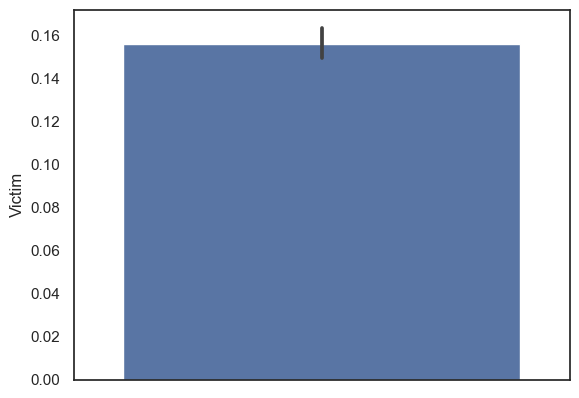

0.1560215053763441

In [7]:
# What proportion of respondants have been a victim of crime in the last 12 months?
sns.barplot(data=crime, y='Victim')
plt.show()
crime.Victim.mean() # get nummerical value

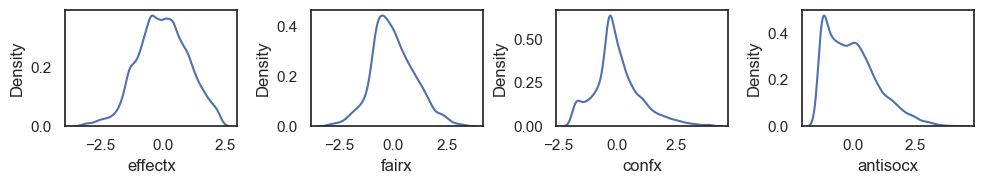

(None, None)

In [8]:
# For each of the attitude variables (effectx, fairx, confx and antisocx) plot the distribution?
plt.figure(figsize=(10,2))
plt.subplot(1,4,1), sns.kdeplot(data=crime, x='effectx')
plt.subplot(1,4,2), sns.kdeplot(data=crime, x='fairx')
plt.subplot(1,4,3), sns.kdeplot(data=crime, x='confx')
plt.subplot(1,4,4), sns.kdeplot(data=crime, x='antisocx')
plt.tight_layout(), plt.show()

**NOTE -** 
We note that these variables take positive and negative values (in fact they have been Z-scored so the mean is zero)
* For fairness (fairx) and effectiveness (effectx) of the criminal justice system, the distribution was fairly symmetrical
* For confidence in the police there is a strong spike around zzero (many people have a neutral attitude - or are they disengaged or have no experience with the police? - later we will break this down by victims/non victims) - there is also a strong positive tail
* For perceptions of 'antisocial behaviour in my neighbourhood' there is a strong positive tail - could it depend on neighbourhood characteristics?


In [9]:
# For the attitude variables (effectx, fairx, confx and antisocx) what is the mean and standard deviation?
# Can you guess how these attitude variables ended up with that mean and standard deviation (think back to the section on standardizing data)?
crime.agg({'effectx':['mean', 'std'], 'fairx':['mean', 'std'], 'confx':['mean', 'std'], 'antisocx':['mean', 'std']})

,effectx,fairx,confx,antisocx
mean,-1.036683e-18,1.354447e-17,2.782911e-17,-0.000870
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000872


The means are 1 and the sd is 0 for each - they have been Z-scored. 

You may need to discuss the use of scientific notation with students, who imght not understand e-17 etc 

You might need to alert students to the fact that a tiny tiny number is basically zero (due to noise/rounding error)

In [10]:
# Which variables have a lot of missing data?
# HINT use df.isna() and sum()
crime.isna().sum()

ID                     0
Sex                    0
Age                   29
AgeGroup               0
EthnicGroup           13
Education           1993
SES                    0
DeprivationIndex     748
Victim                 0
effectx             2446
fairx               4054
confx                619
antisocx             624
dtype: int64

Most demomgraphic variables are near complete (exception is education)

Two of the attitude questions (fairness and effectiveness of the criminal justce system) are incomplete for a high number of respondants.

You or your students might be interested in whether non-response is higher for certain groups; annoyingly I can find no straightforward way to integrate isna() and groupby() - there are ways but they are all fiddly. You can check using df.count() and df.size() as below but only for one variable at a time.

If anyone knows a good solution to this please let me know!

Incidentally, playing around with this I think the groups with the lower response rates are 'Chinese and Other' ethnic group and the 'Other' education group

In [11]:
crime.groupby('EthnicGroup').effectx.count()/crime.groupby('EthnicGroup').size()

EthnicGroup
Asian or Asian British    0.587179
Black or Black British    0.654902
Chinese or other          0.698276
Mixed                     0.851852
White                     0.745885
dtype: float64

## Who is most likely to be a victim of crime?

Explore which demographic variables make a different to the chance of being a victim of crime. Are more men than women victims of crime? etc

**HINT** as <tt>Victim</tt> is coded as 1 (if they have been a victim of crime in the past 12 months) and 0 (otherwise), you can obtain the proportion of people who have been a victim by taking the mean value of the column <tt>Victim</tt>.

You can also use `sns.barplot()` with the `x` and `hue` arguments to plot the proportion who are victims of crime within each category (each age group, etc).

You can also try disaggregating by a second variable, eg does whether men or women are more likely to be victims of crime differ by ethnic group?

In [12]:
# You will add several code blocks here to explore the data

In [13]:
The most likely people to be victims of crime are young people, students, and those living in areas of high deprivation

SyntaxError: invalid syntax (2298387621.py, line 1)

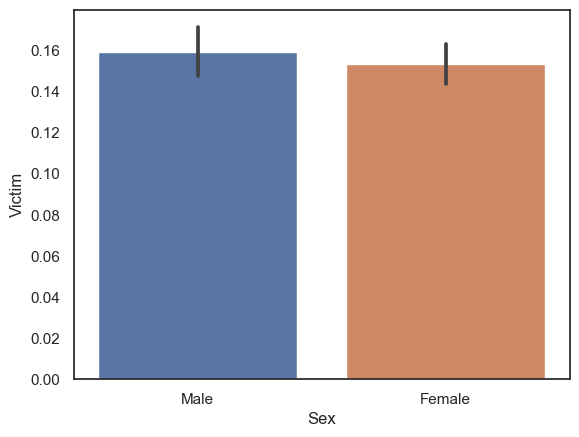

In [60]:
sns.barplot(data=crime, x='Sex', y='Victim')
plt.show()

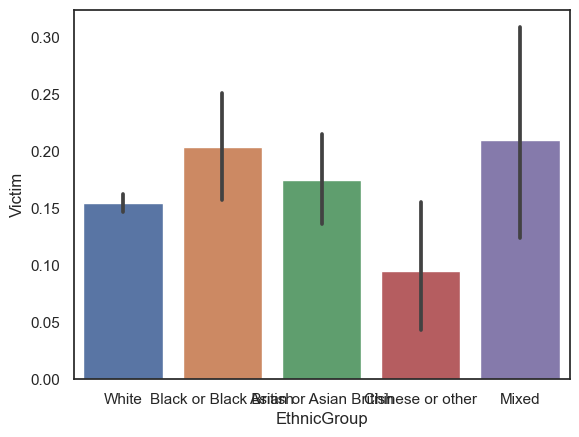

In [63]:
sns.barplot(data=crime, x='EthnicGroup', y='Victim')
plt.show()

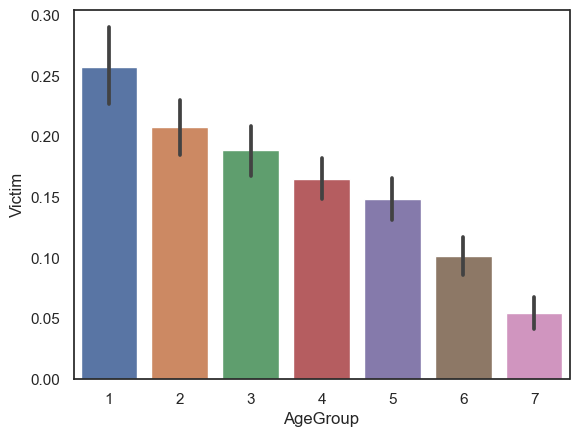

In [64]:
sns.barplot(data=crime, x='AgeGroup', y='Victim')
plt.show()

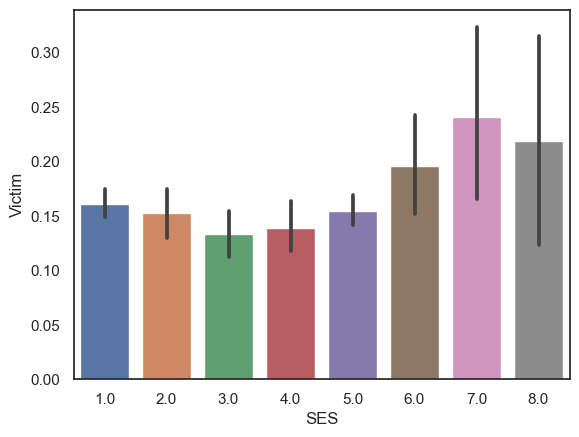

In [65]:
sns.barplot(data=crime, x='SES', y='Victim')
plt.show()

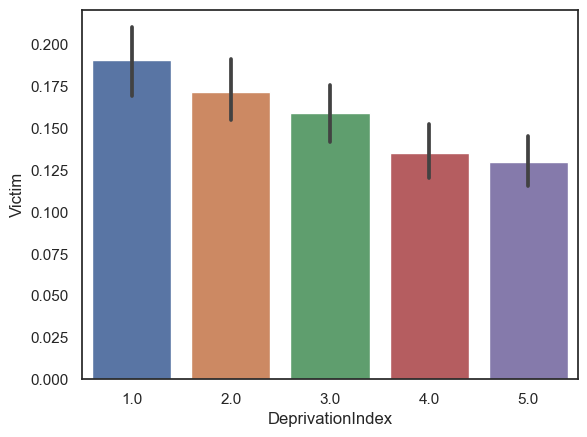

In [66]:
sns.barplot(data=crime, x='DeprivationIndex', y='Victim')
plt.show()

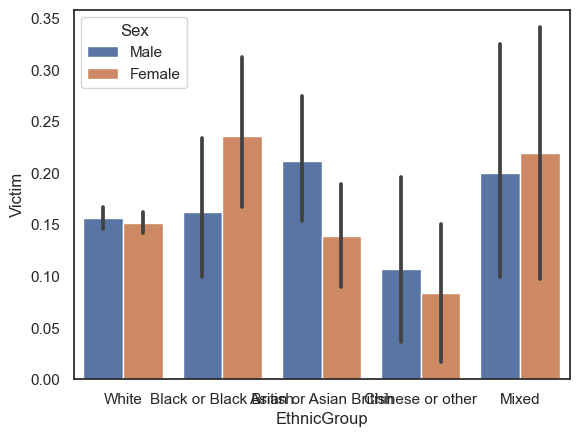

In [62]:
sns.barplot(data=crime, hue='Sex', y='Victim', x='EthnicGroup')
plt.show()

Are students victims of crime because they live in deprived neighbourhoods? Interestingly, whilst for most people there is a relatinoship between deprivation index and likeligood of being a victim of crime, this relationship breaks down for under 25's and for those in the student, unemployed and unclassified SES brackets.

<Axes: xlabel='AgeGroup', ylabel='Victim'>

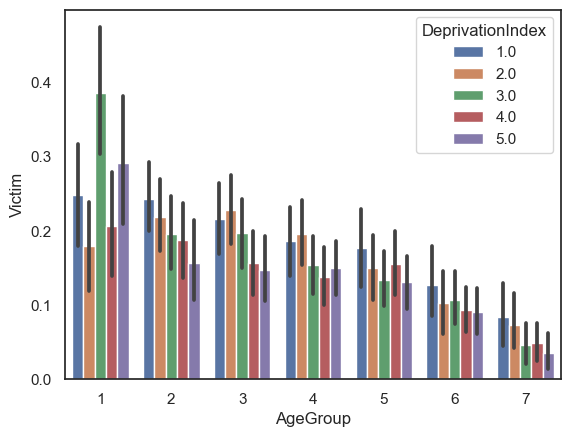

In [68]:
sns.barplot(data=crime, x='AgeGroup', y='Victim', hue='DeprivationIndex')

<Axes: xlabel='SES', ylabel='Victim'>

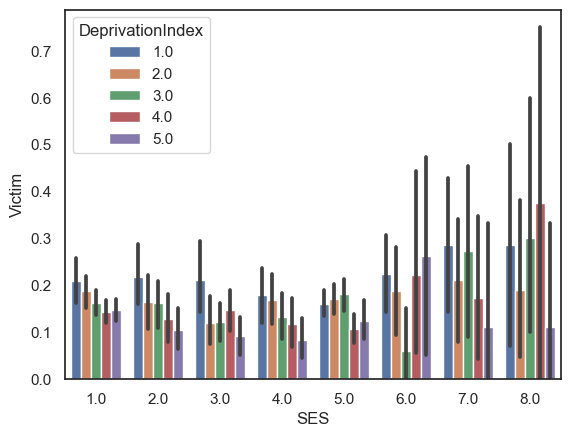

In [71]:
sns.barplot(data=crime, x='SES', y='Victim', hue='DeprivationIndex')

## Do attitudes differ depending on demographics?

Looking at the attitude variables (effectx, fairx, confx and antisocx), which demographic factors seem to influence these?

I found it most helpful to make KDE plots for the distribution of each attitude variable in each demographic group; because there are often many groups to compare, the simplicity of the KDE plot (without shading) is helpful. 

Because there are different numbers of people in each group, you may want to normalize all the KDE plots to have the same area using the argument `commmon_normm=False` as below - this makes it easier to compare groups

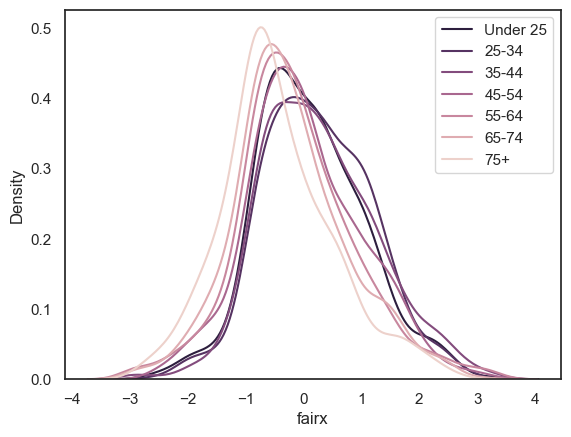

In [25]:
sns.kdeplot(data=crime, x='fairx', hue='AgeGroup', common_norm=False)
plt.legend(labels = ['Under 25','25-34','35-44','45-54','55-64','65-74','75+'])
plt.show()

TUTORS - there is no right answer to how to break the data down!

You may notice that respondants' experience of antisocial behaviour tends to be higher in groups who are more likely to be victims of crime (young people, low SES and those living in areas of high deprivation).

We see some different patterns in the attitudes to the criminal justice system and police, with younger people generally having more positive attitudes. You might also notice that people in with high SES and in areas of low deprivation are more likely to express a neutral attitude on 'confidence in the police'. 

### age

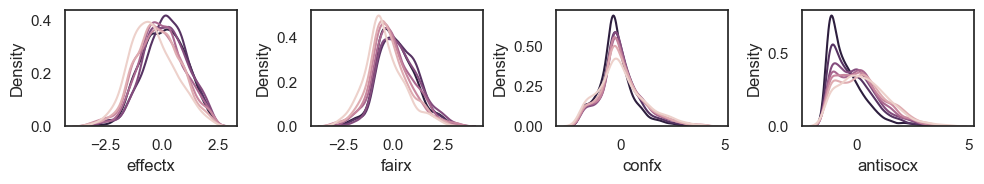

(None, None)

In [78]:
plt.figure(figsize=(10,2))
plt.subplot(1,4,1), sns.kdeplot(data=crime, x='effectx', hue='AgeGroup', common_norm=False, legend=False)
plt.subplot(1,4,2), sns.kdeplot(data=crime, x='fairx', hue='AgeGroup', common_norm=False, legend=False)
plt.subplot(1,4,3), sns.kdeplot(data=crime, x='confx', hue='AgeGroup', common_norm=False, legend=False)
plt.subplot(1,4,4), sns.kdeplot(data=crime, x='antisocx', hue='AgeGroup', common_norm=False, legend=False )
plt.tight_layout(), plt.show()

## deprivation index

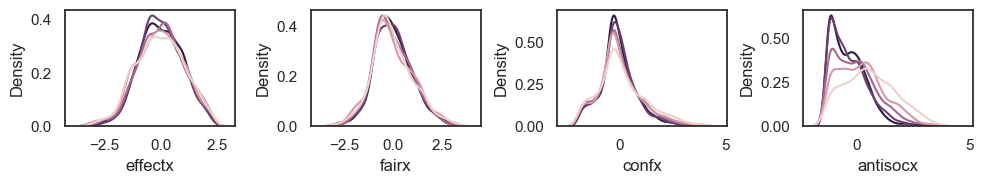

(None, None)

In [82]:
plt.figure(figsize=(10,2))
plt.subplot(1,4,1), sns.kdeplot(data=crime, x='effectx', hue='DeprivationIndex', common_norm=False, legend=False)
plt.subplot(1,4,2), sns.kdeplot(data=crime, x='fairx', hue='DeprivationIndex', common_norm=False, legend=False)
plt.subplot(1,4,3), sns.kdeplot(data=crime, x='confx', hue='DeprivationIndex', common_norm=False, legend=False)
plt.subplot(1,4,4), sns.kdeplot(data=crime, x='antisocx', hue='DeprivationIndex', common_norm=False, legend=False )
plt.tight_layout(), plt.show()

## SES

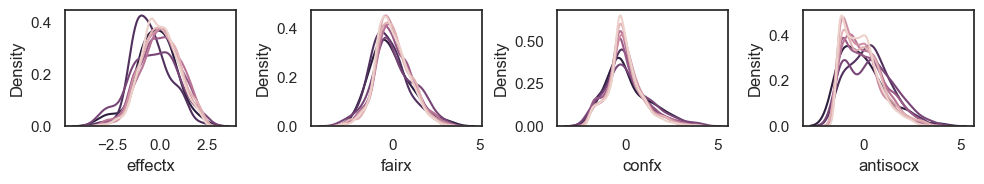

(None, None)

In [83]:
plt.figure(figsize=(10,2))
plt.subplot(1,4,1), sns.kdeplot(data=crime, x='effectx', hue='SES', common_norm=False, legend=False)
plt.subplot(1,4,2), sns.kdeplot(data=crime, x='fairx', hue='SES', common_norm=False, legend=False)
plt.subplot(1,4,3), sns.kdeplot(data=crime, x='confx', hue='SES', common_norm=False, legend=False)
plt.subplot(1,4,4), sns.kdeplot(data=crime, x='antisocx', hue='SES', common_norm=False, legend=False )
plt.tight_layout(), plt.show()

## Do attitudes differ depending on whether the respondant has been a victim of crime?

You can use a similar approach to that used for demographic factors above.

You imght think about disaggregating by some demographic factors - does being a victimm of crime make some groups more confident in the police (etc) and other groups, less confident? What might this say about different groups/ interactions with the police?

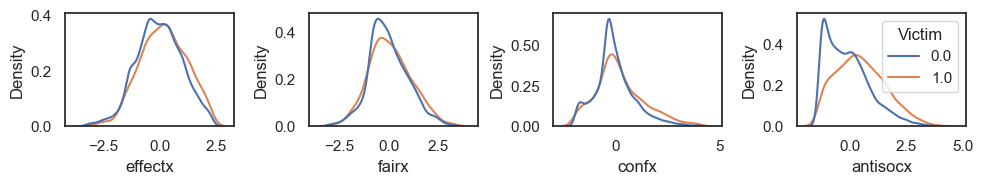

(None, None)

In [85]:
plt.figure(figsize=(10,2))
plt.subplot(1,4,1), sns.kdeplot(data=crime, x='effectx', hue='Victim', common_norm=False, legend=False)
plt.subplot(1,4,2), sns.kdeplot(data=crime, x='fairx', hue='Victim', common_norm=False, legend=False)
plt.subplot(1,4,3), sns.kdeplot(data=crime, x='confx', hue='Victim', common_norm=False, legend=False)
plt.subplot(1,4,4), sns.kdeplot(data=crime, x='antisocx', hue='Victim', common_norm=False, legend=True )
plt.tight_layout(), plt.show()

If anything, those who have been a victim of crime have slightly mmore positive attitudes to the criminal justice system and police than those who ave not. 



## Conclusions

Young people, students and those living in areas of high deprivation are more likely to be victims of crime and are more likely to experience antisocial behaviour in their neighbourhood.

Perhaps surprisingly, there is little diference in attitudes to the police and criminal justice system between these groups, and those groups who experience much less crime and antisocial behaviour; there is a slight effect that people of low SES or in areas of deprivation have momre positive, rather than neutral, attitudes to the police. There is quite a strong effect that young people have more positive attitudes to the criminal justice system than older people, despite experiencing mmore crime and antisocial behaviour.

Those who have been a victim of crime have slightly higher average confidence in the police than those who have not; mainly, a large proportion of people who have not been victims of crime expressed neutral attitudes to the police.